<a href="https://colab.research.google.com/github/user-2608/Autoviz/blob/main/bigbasket001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import json
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import time

In [ ]:
# test_url = 'https://www.bigbasket.com/product/get-products/?page=2&listtype=pc'

In [ ]:
def get_product_urls():
    urls = []
    for page in range(2,1111):
        test_url = f'https://www.bigbasket.com/product/get-products/?page={page}&listtype=pc'
        print(page,": ",test_url)
        try:
            request = requests.get(url=test_url, headers={'User-Agent': 'GoogleBot/1.0'})
            if request.status_code == 200:
                data = request.json()
                for x in data['tab_info']['product_map']['all']['prods']:
                    for y in x['all_prods']:
                        url = 'https://bigbasket.com'+ y['absolute_url']
                        urls.append({'product': x['p_desc'], 'url': url})
                        print(urls[-1])
                # Save URLs to Google Drive in JSON format
                with open('/content/drive/My Drive/product_urls_variant_.json', 'w') as f:
                    json.dump(urls, f)
            else:
                print(f"Failed to retrieve page {page}")
        except Exception as e:
            print(f"Error retrieving page {page}: {e}")
    return urls
    if page % 100 == 0:
      time.sleep(1)


In [ ]:
product_urls = []
product_urls.append(get_product_urls())

Streaming output truncated to the last 5000 lines.
{'product': 'Olive Oil - Pure, Classic', 'url': 'https://bigbasket.com/pd/40006906/borges-olive-oil-classic-500-ml-bottle/'}
{'product': 'Olive Oil - Pure, Classic', 'url': 'https://bigbasket.com/pd/267276/borges-olive-oil-pure-classic-1-l-bottle/'}
{'product': 'Cerelac - Wheat, Stage 1', 'url': 'https://bigbasket.com/pd/240178/nestle-cerelac-baby-cereal-with-milk-wheat-from-6-12-months-rich-in-iron-300-g-bag-in-box/'}
{'product': 'Cerelac - Wheat, Stage 1', 'url': 'https://bigbasket.com/pd/1201661/nestle-cerelac-wheat-stage-1-2x300-g/'}
{'product': 'Organic - Moong Dal/Hesaru Bele, Unpolished', 'url': 'https://bigbasket.com/pd/40109378/bb-royal-organic-moong-dal-unpolished-2-kg/'}
{'product': 'Organic - Moong Dal/Hesaru Bele, Unpolished', 'url': 'https://bigbasket.com/pd/40203924/bb-royal-organic-moong-dal-5-kg/'}
{'product': 'Organic - Moong Dal/Hesaru Bele, Unpolished', 'url': 'https://bigbasket.com/pd/40072478/bb-royal-organic-moon

In [ ]:
def product_urls():
    urls = []
    for page in range(2,1109):
        test_url = f'https://www.bigbasket.com/product/get-products/?page={page}&listtype=pc'
        print(page,": ",test_url)
        try:
            request = requests.get(url=test_url, headers={'User-Agent': 'GoogleBot/1.0'})
            if request.status_code == 200:
                data = request.json()
                for x in data['tab_info']['product_map']['all']['prods']:
                    for y in x['all_prods']:
                        url = 'https://bigbasket.com'+ y['absolute_url']
                        print(url)
                        urls.append(url)
            else:
                print(f"Failed to retrieve page {page}")
        except Exception as e:
            print(f"Error retrieving page {page}: {e}")
    return urls


In [ ]:
product_url = []
product_url.append(product_urls())

Streaming output truncated to the last 5000 lines.
https://bigbasket.com/pd/40237549/dorje-roasted-flush-darjeeling-green-tea-with-light-flavour-sweet-after-taste-100-g/
https://bigbasket.com/pd/40237550/dorje-monsoon-flush-darjeeling-green-tea-with-light-flavour-sweet-after-taste-250-g/
https://bigbasket.com/pd/40237560/dorje-second-flush-darjeeling-green-tea-mild-flavour-rich-in-antioxidants-250-g/
https://bigbasket.com/pd/40237559/dorje-second-flush-darjeeling-green-tea-mild-flavour-rich-in-antioxidants-100-g/
https://bigbasket.com/pd/40237561/dorje-autumn-flush-darjeeling-green-tea-rich-in-antioxidants-100-g/
https://bigbasket.com/pd/40237562/dorje-autumn-flush-darjeeling-green-tea-rich-in-antioxidants-250-g/
https://bigbasket.com/pd/40204040/earthon-organic-mustard-oilrai-oil-1-l/
https://bigbasket.com/pd/40171742/earthon-organic-mustard-oilrai-ka-tel-500-ml/
https://bigbasket.com/pd/40204046/earthon-organic-ground-nut-oilmungaphali-oil-500-ml/
https://bigbasket.com/pd/40204039/ea

In [ ]:
def get_product_info(url):
  info = {'url':url}
  result = requests.get(url=url, headers={'User-Agent': 'GoogleBot/1.0'})
  test00 = BeautifulSoup(result.text, 'html.parser')
  ean_code, mrp, name, desc, images = '','','','',''
  try:
    ean_code_ = test00.find_all(attrs={"_26MFu _2fn-7"})
    for ean_code in ean_code_:
        if "EAN Code:" in ean_code.text:
            ean_text = ean_code.text.strip()
            ean_code = ean_text.split('EAN Code: ')[-1].split(' ')[0]
  except Exception as e:
    print(e)
  try:
    mrps = test00.find_all(attrs={'class':'VqK9O'})
    for price in mrps:
        if "MRP:" in price.text:
            price_ = price.text.strip()
            mrp = ean_text.split(" ")[1]
  except Exception as e:
    print(e)
  try:
    names = test00.find_all(attrs={'class':'GrE04'})
    for name in names:
        if name is not None:
          name = name.getText().strip()
  except Exception as e:
    print(e)
  try:
    desc_ = test00.find_all(attrs={'class':'_26MFu'})
    for desc in desc_:
      if desc is not None:
        desc = desc.getText().strip()
  except Exception as e:
    pass
  try:
    images = []
    img_ = test00.find_all(attrs={'class':'_3oKVV'})
    for img in img_:
      if img is not None:
        img = img.get("src")
        if '.jpg' in img:
          images.append(img) 
    images = images[0:5]
  except Exception as e:
    print(e)
  info.update({'barcode':ean_code,'product_name':name, 'product_mrp':mrp, 'product_desc':desc, 'product_images':images})
  print(info)
  return info


In [ ]:
product_url[0][-10:]

['https://bigbasket.com/pd/40149789/inatur-monoi-oil-shampoo-100-ml/',
 'https://bigbasket.com/pd/40149790/inatur-monoi-oil-shampoo-350-ml/',
 'https://bigbasket.com/pd/40159121/luvlap-anti-bacterial-baby-bottle-accessories-vegetable-liquid-cleanser-500-ml/',
 'https://bigbasket.com/pd/40159122/luvlap-anti-bacterial-baby-bottle-accessories-vegetable-liquid-cleanser-1-l/',
 'https://bigbasket.com/pd/40229708/jus-amazin-organic-quinoa-high-protein-superfood-rich-in-dietary-fiber-anti-oxidants-500-g/',
 'https://bigbasket.com/pd/40229709/jus-amazin-organic-quinoa-high-protein-superfood-rich-in-dietary-fiber-anti-oxidants-1-kg/',
 'https://bigbasket.com/pd/40200899/jivika-naturals-sesame-oil-wood-pressed-cold-pressed-oils-1-l/',
 'https://bigbasket.com/pd/40256931/jivika-naturals-cold-pressed-sesame-oil-wooden-ghani-pressed-boosts-immunity-100-pure-unrefined-5-l/',
 'https://bigbasket.com/pd/40252381/anveshan-himalayan-coriander-powder-stone-ground-natural-no-preservatives-chemical-free-30

In [ ]:
import json
with open("product_urls.json", "w") as f:
  f.write(json.dumps(product_url[0]))

In [ ]:
get_product_info(product_url[0][0])

{'url': 'https://bigbasket.com/pd/10000128/fresho-lemon-500-g/', 'barcode': <div class="_26MFu _2fn-7">Please note that the item(s) in this product may vary slightly in size and weight. Hence, the actual weight of the product delivered can have a small variance. You will be billed based on the actual weight during order processing.</div>, 'product_name': 'Fresho Lemon (Loose), 500 g', 'product_mrp': 'Code:', 'product_desc': 'Please note that the item(s) in this product may vary slightly in size and weight. Hence, the actual weight of the product delivered can have a small variance. You will be billed based on the actual weight during order processing.', 'product_images': ['https://www.bigbasket.com/media/uploads/p/l/10000128_17-fresho-lemon.jpg', 'https://www.bigbasket.com/media/uploads/p/l/10000128-2_7-fresho-lemon.jpg', 'https://www.bigbasket.com/media/uploads/p/l/10000128-3_3-fresho-lemon.jpg', 'https://www.bigbasket.com/media/uploads/p/l/10000128-4_2-fresho-lemon.jpg', 'https://www

{'url': 'https://bigbasket.com/pd/10000128/fresho-lemon-500-g/',
 'barcode': <div class="_26MFu _2fn-7">Please note that the item(s) in this product may vary slightly in size and weight. Hence, the actual weight of the product delivered can have a small variance. You will be billed based on the actual weight during order processing.</div>,
 'product_name': 'Fresho Lemon (Loose), 500 g',
 'product_mrp': 'Code:',
 'product_desc': 'Please note that the item(s) in this product may vary slightly in size and weight. Hence, the actual weight of the product delivered can have a small variance. You will be billed based on the actual weight during order processing.',
 'product_images': ['https://www.bigbasket.com/media/uploads/p/l/10000128_17-fresho-lemon.jpg',
  'https://www.bigbasket.com/media/uploads/p/l/10000128-2_7-fresho-lemon.jpg',
  'https://www.bigbasket.com/media/uploads/p/l/10000128-3_3-fresho-lemon.jpg',
  'https://www.bigbasket.com/media/uploads/p/l/10000128-4_2-fresho-lemon.jpg',
 

In [ ]:
info_list = []
for i in product_url[0]:
  info_list.append(product_info(i))

https://www.bigbasket.com/product/get-products/?page=2&listtype=pc
https://bigbasket.com/pd/40030808/bb-royal-cuminjeera-whole-1-kg/
https://bigbasket.com/pd/40026603/bb-royal-cuminjeera-whole-500-g-pouch/
https://bigbasket.com/pd/30000308/bb-royal-cuminjeera-whole-50-g/
https://bigbasket.com/pd/10000486/bb-royal-cuminjeera-whole-200-g-pouch/
https://bigbasket.com/pd/10000479/bb-royal-cuminjeera-whole-100-g-pouch/
https://bigbasket.com/pd/1215361/epigamia-greek-yogurt-natural-6x90-g/
https://bigbasket.com/pd/40046546/epigamia-greek-yogurt-natural-90-g-cup/
https://bigbasket.com/pd/1200551/epigamia-greek-yogurt-natural-4x90-g/
https://bigbasket.com/pd/10000187/fresho-palak-cleaned-without-roots-1-kg/
https://bigbasket.com/pd/10000188/fresho-palak-cleaned-without-roots-500-g/
https://bigbasket.com/pd/20000979/fresho-palak-cleaned-without-roots-250-g/
https://bigbasket.com/pd/263754/harpic-power-plus-disinfectant-toilet-cleaner-liquid-original-500-ml/
https://bigbasket.com/pd/1200366/harp

KeyboardInterrupt: ignored

In [ ]:
data.keys()

dict_keys(['tab_info', 'screen_name'])

In [ ]:
data.keys()

dict_keys(['tab_info', 'screen_name'])

In [ ]:
len(data['tab_info']['product_map']['all']['prods'])

36

In [ ]:
data['tab_info']['product_map']['all']['prods'][0].keys()

dict_keys(['store_availability', 'llc_n', 'sp', 'base_unit', 'pop_rank', 'all_prods', 'gift_msg', 'is_new', 'pack_desc', 'p_type', 'combo_skus', 'attrs', 'store_ids', 'llc_s', 'j_offer_detail', 'sale_info', 'sku', 'es_percent', 'tlc_s', 'offer_score', 'p_img_url', 'absolute_url', 'display_order', 'dis_val', 'mrp', 'p_brand', 'additional_info', 'dis_t', 'rating_info', 'es_amt', 'w', 'usp', 'pc_n', 'tlc_n', 'p_promo_info', 'is_bby', 'p_desc', 'base_price'])

In [ ]:
data['tab_info']['product_map']['all']['prods'][0]['sku']

10000127

In [ ]:
data['tab_info']['product_map']['all']['prods'][0]['mrp']

'69.08'

In [ ]:
data['tab_info']['product_map']['all']['prods'][0]['sp']

'52.50'

In [ ]:
len(data['tab_info']['product_map']['all']['prods'][0]['all_prods'])

4

In [ ]:
data['tab_info']['product_map']['all']['prods'][0]['all_prods'][0].keys()

dict_keys(['store_availability', 'llc_n', 'sp', 'base_unit', 'pop_rank', 'gift_msg', 'is_new', 'pack_desc', 'p_type', 'combo_skus', 'attrs', 'store_ids', 'llc_s', 'j_offer_detail', 'sale_info', 'sku', 'es_percent', 'tlc_s', 'offer_score', 'p_img_url', 'absolute_url', 'display_order', 'dis_val', 'mrp', 'p_brand', 'additional_info', 'dis_t', 'rating_info', 'es_amt', 'w', 'usp', 'pc_n', 'tlc_n', 'p_promo_info', 'is_bby', 'p_desc', 'base_price'])

In [ ]:
data['tab_info']['product_map']['all']['prods'][0]['all_prods'][0]['absolute_url']

'/pd/10000128/fresho-lemon-500-g/'

KeyError: ignored

In [ ]:
urls = []
for x in data['tab_info']['product_map']['all']['prods']:
  for y in x['all_prods']:
    url = 'https://bigbasket.com'+ y['absolute_url']
    print(url)
    urls.append(url)




https://bigbasket.com/pd/10000128/fresho-lemon-500-g/
https://bigbasket.com/pd/10000335/fresho-lemon-1-kg/
https://bigbasket.com/pd/10000126/fresho-lemon-100-g/
https://bigbasket.com/pd/10000127/fresho-lemon-250-g/
https://bigbasket.com/pd/10000033/fresho-banana-yelakki-500-g/
https://bigbasket.com/pd/10000031/fresho-banana-yelakki-1-kg/
https://bigbasket.com/pd/10000097/fresho-coriander-leaves-100-g/
https://bigbasket.com/pd/10000098/fresho-coriander-leaves-250-g/
https://bigbasket.com/pd/10000326/fresho-coriander-leaves-1-kg/
https://bigbasket.com/pd/256652/pedigree-dry-dog-food-chicken-vegetables-for-adult-dogs-12-kg/
https://bigbasket.com/pd/265378/pedigree-dry-dog-food-chicken-vegetables-for-adult-dogs-400-g/
https://bigbasket.com/pd/30005108/pedigree-dry-dog-food-chicken-vegetables-for-adult-dogs-15-kg/
https://bigbasket.com/pd/40252412/pedigree-adult-dry-dog-food-chicken-vegetables-balanced-nutrition-for-dogs-overall-health-20-kg/
https://bigbasket.com/pd/10000661/fresho-broccol

In [ ]:
def product_urls():
  urls = []
  for page in range(2,1109):
    test_url = f'https://www.bigbasket.com/product/get-products/?page={page}&listtype=pc'
    print(test_url)
    request = requests.get(url=test_url, headers={'User-Agent': 'GoogleBot/1.0'})
    if rquest.status != 200:
      data = req.json()
      for x in data['tab_info']['product_map']['all']['prods']:
        for y in x['all_prods']:
          url = 'https://bigbasket.com'+ y['absolute_url']
          print(url)
          urls.append(url)
    return urls


In [ ]:
len(product_urls())

https://bigbasket.com/pd/10000128/fresho-lemon-500-g/
https://bigbasket.com/pd/10000335/fresho-lemon-1-kg/
https://bigbasket.com/pd/10000126/fresho-lemon-100-g/
https://bigbasket.com/pd/10000127/fresho-lemon-250-g/
https://bigbasket.com/pd/10000033/fresho-banana-yelakki-500-g/
https://bigbasket.com/pd/10000031/fresho-banana-yelakki-1-kg/
https://bigbasket.com/pd/10000097/fresho-coriander-leaves-100-g/
https://bigbasket.com/pd/10000098/fresho-coriander-leaves-250-g/
https://bigbasket.com/pd/10000326/fresho-coriander-leaves-1-kg/
https://bigbasket.com/pd/256652/pedigree-dry-dog-food-chicken-vegetables-for-adult-dogs-12-kg/
https://bigbasket.com/pd/265378/pedigree-dry-dog-food-chicken-vegetables-for-adult-dogs-400-g/
https://bigbasket.com/pd/30005108/pedigree-dry-dog-food-chicken-vegetables-for-adult-dogs-15-kg/
https://bigbasket.com/pd/40252412/pedigree-adult-dry-dog-food-chicken-vegetables-balanced-nutrition-for-dogs-overall-health-20-kg/
https://bigbasket.com/pd/10000661/fresho-broccol

95

In [ ]:
result = requests.get(url = product_urls()[-1], headers={'User-Agent': 'GoogleBot/1.0'})

https://bigbasket.com/pd/10000128/fresho-lemon-500-g/
https://bigbasket.com/pd/10000335/fresho-lemon-1-kg/
https://bigbasket.com/pd/10000126/fresho-lemon-100-g/
https://bigbasket.com/pd/10000127/fresho-lemon-250-g/
https://bigbasket.com/pd/10000033/fresho-banana-yelakki-500-g/
https://bigbasket.com/pd/10000031/fresho-banana-yelakki-1-kg/
https://bigbasket.com/pd/10000097/fresho-coriander-leaves-100-g/
https://bigbasket.com/pd/10000098/fresho-coriander-leaves-250-g/
https://bigbasket.com/pd/10000326/fresho-coriander-leaves-1-kg/
https://bigbasket.com/pd/256652/pedigree-dry-dog-food-chicken-vegetables-for-adult-dogs-12-kg/
https://bigbasket.com/pd/265378/pedigree-dry-dog-food-chicken-vegetables-for-adult-dogs-400-g/
https://bigbasket.com/pd/30005108/pedigree-dry-dog-food-chicken-vegetables-for-adult-dogs-15-kg/
https://bigbasket.com/pd/40252412/pedigree-adult-dry-dog-food-chicken-vegetables-balanced-nutrition-for-dogs-overall-health-20-kg/
https://bigbasket.com/pd/10000661/fresho-broccol

In [ ]:
test00 = BeautifulSoup(result.text, 'html.parser')

<!DOCTYPE html>
<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1, maximum-scale=5, shrink-to-fit=no, user-scalable=yes" name="viewport"/>
<meta content="#689f38" name="theme-color"/>
<title data-react-helmet="true">Buy Maggi Noodles Masala 560 Gm Pouch Online At Best Price of Rs 109  - bigbasket</title>
<meta content="Buy Maggi Noodles Masala 560 Gm Pouch Online At Best Price Now available at Rs 109. " data-react-helmet="true" name="description"><meta content="MAGGI  2-Min Masala Instant Noodles, 560 g Pouch " data-react-helmet="true" name="keywords"><meta content="https://www.bigbasket.com/pd/266109/maggi-2-minute-instant-noodles-masala-560-g-pouch/" data-react-helmet="true" property="og:url"><meta content="website" data-react-helmet="true" property="og:type"/><meta content="Buy Maggi Noodles Masala 560 Gm Pouch Online At Best Price of Rs 109  - bigbasket" data-react-helmet="true" property="og:title"/><meta content="Buy Maggi Noodles Ma
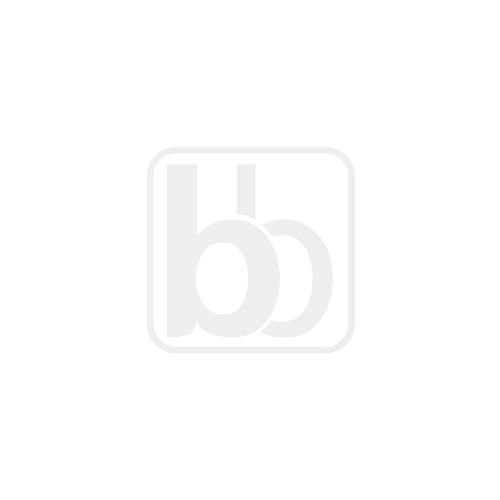
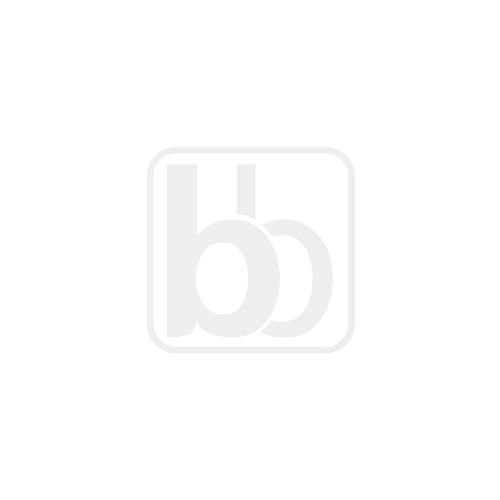
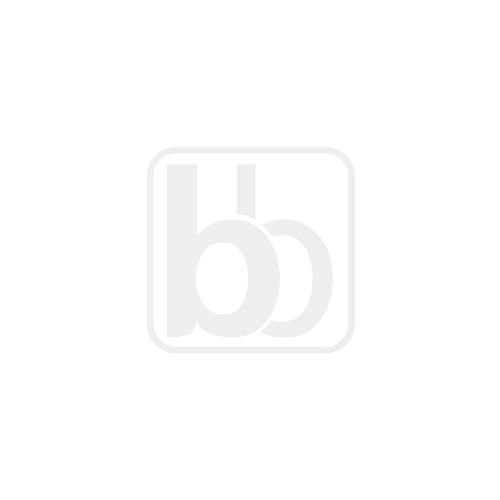
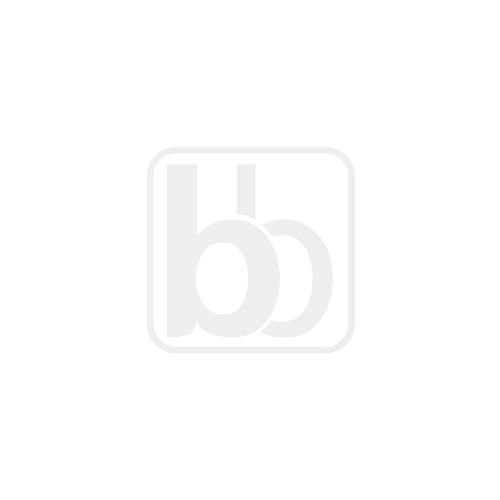
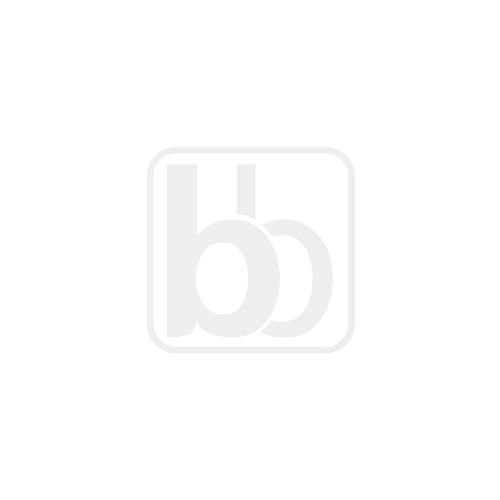

In [ ]:
test00

In [ ]:
test00.find_all(attrs={"_26MFu _2fn-7"})

[<div class="_26MFu _2fn-7">
 <div style="font-family: 'ProximaNova-Regular';font-size:13px;line-height: 18px;color:8f8f8f;">
 <ul>
 <li><strong>Noodles: </strong>Refined wheat flour (Maida), Palm oil, Iodised salt, Wheat gluten, Thickeners (508 &amp; 412), Acidity Regulators (501 (i) &amp; 500 (i)) and Humectant (451(i)).</li>
 <li><strong>Masala Tastemaker :</strong> Mixed spices (25.6%) (Onion powder, Coriander powder, Turmeric powder, Red chilli powder, Garlic powder, Cumin powder, Aniseed powder, Ginger powder, Fenugreek powder, Black peeper powder, Clove powder, Green cardamom powder &amp; Nutmeg powder), Refined wheat flour (Maida), Hydrolysed groundnut protein, Sugar, palm oil, Iodised salt, Starch, Thickener(508), Flavour enhancer (635), Toasted onion flakes, Acidity regulator (330), Mineral, Colour (150d) and Wheat gluten. Contains Wheat and Nut. May contain Milk, Mustard, Oats and Soy.</li>
 </ul>
 </div></div>,
 <div class="_26MFu _2fn-7">
 <div style="font-family: 'Proxima

In [ ]:
ean_code_ = test00.find_all(attrs={"_26MFu _2fn-7"})
for ean_code in ean_code_:
    if "EAN Code:" in ean_code.text:
        ean_text = ean_code.text.strip()
        ean_code = ean_text.split('EAN Code: ')[-1].split(' ')[0]
        print(ean_code)
mrps = test00.find_all(attrs={'class':'VqK9O'})
for price in mrps:
    if "MRP:" in price.text:
        price_ = price.text.strip()
        mrp = ean_text.split(" ")[1]
        print(mrp)
names = test00.find_all(attrs={'class':'GrE04'})
for name in names:
    if name is not None:
      name = name.getText().strip()
      print(name)
desc_ = test00.find_all(attrs={'class':'_26MFu'})
for desc in desc_:
  if desc is not None:
    desc = desc.getText().strip()
    print(desc)

images = []
img_ = test00.find_all(attrs={'class':'_3oKVV'})
for img in img_:
  if img is not None:
    img = img.get("src")
    if '.jpg' in img:
      images.append(img) 
images = images[0:5]
print(images)
  


8901058901573


In [ ]:
ean_code = ean_text.split('EAN Code: ')[-1].split(' ')[0]


In [ ]:
ean_code

'8901058901573'

In [ ]:
price = test00.find(attrs={"IyLvo"}).getText().strip().split()[1]

In [ ]:
test00.find_all(attrs={'class':'VqK9O'})

[<div class="VqK9O"><div id="price"><table><tbody class="_6eiYL" id="266109"><tr class="_157dw"><td> <!-- -->MRP:</td><td class="IyLvo" data-qa="productPrice">Rs <!-- -->109</td><td></td><td class="_2uSMb">(Rs.<!-- -->0.19<!-- -->/<!-- -->g<!-- -->)</td></tr><tr><td></td> <td>(Inclusive of all taxes)</td></tr></tbody></table></div></div>]

In [ ]:
mrps = test00.find_all(attrs={'class':'VqK9O'})
for price in mrps:
    if "MRP:" in price.text:
        price_ = price.text.strip()
        mrp = ean_text.split(" ")[1]
        print(mrp)

109(Rs.0.19/g)


In [ ]:
names = test00.find_all(attrs={'class':'GrE04'})
for name in names:
    if name is not None:
      name = name.getText().strip()
      print(name)

MAGGI  2-Min Masala Instant Noodles, 560 g Pouch


AttributeError: ignored

In [ ]:
images = []
img_ = test00.find_all(attrs={'class':'_3oKVV'})
for img in img_:
  if img is not None:
    img = img.get("src")
    if '.jpg' in img:
      images.append(img) 
images = images[0:5]
print(images)

['https://www.bigbasket.com/media/uploads/p/l/266109_20-maggi-2-minute-instant-noodles-masala.jpg', 'https://www.bigbasket.com/media/uploads/p/l/266109-2_16-maggi-2-minute-instant-noodles-masala.jpg', 'https://www.bigbasket.com/media/uploads/p/l/266109-3_14-maggi-2-minute-instant-noodles-masala.jpg', 'https://www.bigbasket.com/media/uploads/p/l/266109-4_2-maggi-2-minute-instant-noodles-masala.jpg', 'https://www.bigbasket.com/media/uploads/p/l/266109-5_2-maggi-2-minute-instant-noodles-masala.jpg']


In [ ]:
images = images[0:5]

['https://www.bigbasket.com/media/uploads/p/l/266109_20-maggi-2-minute-instant-noodles-masala.jpg',
 'https://www.bigbasket.com/media/uploads/p/l/266109-2_16-maggi-2-minute-instant-noodles-masala.jpg',
 'https://www.bigbasket.com/media/uploads/p/l/266109-3_14-maggi-2-minute-instant-noodles-masala.jpg',
 'https://www.bigbasket.com/media/uploads/p/l/266109-4_2-maggi-2-minute-instant-noodles-masala.jpg',
 'https://www.bigbasket.com/media/uploads/p/l/266109-5_2-maggi-2-minute-instant-noodles-masala.jpg']

In [ ]:
li = [1,2,3,8]

In [ ]:
li[0:9]

[1, 2, 3, 8]

In [ ]:
def get_product_urls(test_url):
    urls = []
    try:
        request = requests.get(url=test_url, headers={'User-Agent': 'GoogleBot/1.0'})
        if request.status_code == 200:
            data = request.json()
            for x in data['tab_info']['product_map']['all']['prods']:
                for y in x['all_prods']:
                    url = 'https://bigbasket.com'+ y['absolute_url']
                    print(url)
                    urls.append(url)
            # Save URLs to Google Drive in JSON format
            # with open('/content/drive/My Drive/product_urls.json', 'w') as f:
                # json.dump(urls, f)
        else:
            print(f"Failed to retrieve page {page}")
    except Exception as e:
        print(f"Error retrieving page {page}: {e}")
    return urls

In [ ]:
product_urls = []
product_urls.append(get_product_urls('https://www.bigbasket.com/product/get-products/?page=516&listtype=pc'))

https://bigbasket.com/pd/40268552/kloze-advance-3-cartridge-32-g/
https://bigbasket.com/pd/40268551/kloze-advance-3-cartridges-27-g/
https://bigbasket.com/pd/40268554/kloze-advance-5-cartridges-29-g/
https://bigbasket.com/pd/40268555/kloze-advance-5-cartridges-lubricating-gel-strip-33-g/
https://bigbasket.com/pd/1222760/leafy-tales-planter-dripping-tray-strong-durable-white-8-inch-3-x-1-pc/
https://bigbasket.com/pd/40245914/leafy-tales-planter-dripping-tray-strong-durable-for-indooroutdoor-plants-white-8-inch-1-pc/
https://bigbasket.com/pd/40290432/chik-herbal-solutions-panchratan-shampoo-onion-amla-for-soft-smooth-voluminous-hair-1-l/
https://bigbasket.com/pd/40290429/chik-herbal-solutions-panchratan-shampoo-onion-amla-for-soft-smooth-voluminous-hair-175-ml/
https://bigbasket.com/pd/40290430/chik-herbal-solutions-panchratan-shampoo-onion-amla-for-soft-smooth-voluminous-hair-340-ml/
https://bigbasket.com/pd/40290431/chik-herbal-solutions-panchratan-shampoo-onion-amla-for-soft-smooth-vo

In [ ]:
req = requests.get(url='https://www.bigbasket.com/product/get-products/?page=516&listtype=pc', headers={'User-Agent': 'GoogleBot/1.0'})

In [ ]:
data = req.json()

In [ ]:
data.keys()

dict_keys(['tab_info', 'screen_name'])

In [ ]:
print(data['tab_info'])

{'product_map': {'all': {'prods': [{'store_availability': [{'tab_type': 'standard', 'pstat': 'A', 'availability_info_id': '1.1', 'store_id': '1'}, {'tab_type': 'standard', 'pstat': 'A', 'availability_info_id': '3630.1', 'store_id': '3630'}], 'llc_n': 'Face Care', 'sp': '559.20', 'base_unit': 'pc', 'pop_rank': 0, 'all_prods': [], 'gift_msg': '', 'is_new': False, 'pack_desc': '', 'p_type': '', 'combo_skus': [], 'attrs': {}, 'store_ids': [], 'llc_s': 'type=pc&slug=face-care', 'j_offer_detail': {'d_avail': 'true', 'd_text': '20% OFF', 'offer_entry_text': '', 'offer_comm_enabled': 'true', 'offer_available': 'false', 'sec_price': {}, 'icon': {}}, 'sale_info': {}, 'sku': 40255765, 'es_percent': 0, 'tlc_s': 'beauty-hygiene', 'offer_score': 0, 'p_img_url': 'https://www.bigbasket.com/media/uploads/p/mm/40255765_1-loreal-paris-uv-defender-serum-protector-spf-50-pa-bright-clear-non-sticky-sunscreen-with-niacinamide-uva-uvb-protection.jpg', 'absolute_url': '/pd/40255765/loreal-paris-uv-defender-ser

In [ ]:
len(data['tab_info']['product_map']['all']['prods'])

36

In [ ]:
data['tab_info']['product_map']['all']['prods'][0].keys()

dict_keys(['store_availability', 'llc_n', 'sp', 'base_unit', 'pop_rank', 'all_prods', 'gift_msg', 'is_new', 'pack_desc', 'p_type', 'combo_skus', 'attrs', 'store_ids', 'llc_s', 'j_offer_detail', 'sale_info', 'sku', 'es_percent', 'tlc_s', 'offer_score', 'p_img_url', 'absolute_url', 'display_order', 'dis_val', 'mrp', 'p_brand', 'additional_info', 'dis_t', 'rating_info', 'es_amt', 'w', 'usp', 'pc_n', 'tlc_n', 'p_promo_info', 'is_bby', 'p_desc', 'base_price'])

In [ ]:
data['tab_info']['product_map']['all']['prods'][0]['all_prods']

[]

In [ ]:
weight = data['tab_info']['product_map']['all']['prods'][0]['w']
main_category = data['tab_info']['product_map']['all']['prods'][0]['tlc_n']
sub_category = data['tab_info']['product_map']['all']['prods'][0]['pc_n']
sub_category_ = data['tab_info']['product_map']['all']['prods'][0]['llc_n']
brand = data['tab_info']['product_map']['all']['prods'][0]['p_brand']
name = data['tab_info']['product_map']['all']['prods'][0]['absolute_url'].strip().split('/')[-2].replace('-',' ')
product_sku = data['tab_info']['product_map']['all']['prods'][0]['sku']
product_url = 'https://www.bigbasket.com' + data['tab_info']['product_map']['all']['prods'][0]['absolute_url']

In [ ]:
product_url

'https://www.bigbasket.com/pd/40255765/loreal-paris-uv-defender-serum-protector-spf-50-pa-bright-clear-non-sticky-sunscreen-with-niacinamide-uva-uvb-protection-50-ml/'

In [ ]:
# data = request.json()
for x in data['tab_info']['product_map']['all']['prods']:
    for y in x['all_prods']:
        url = 'https://bigbasket.com'+ y['absolute_url']
        print(url)
        # urls.append(url)

https://bigbasket.com/pd/40268552/kloze-advance-3-cartridge-32-g/
https://bigbasket.com/pd/40268551/kloze-advance-3-cartridges-27-g/
https://bigbasket.com/pd/40268554/kloze-advance-5-cartridges-29-g/
https://bigbasket.com/pd/40268555/kloze-advance-5-cartridges-lubricating-gel-strip-33-g/
https://bigbasket.com/pd/1222760/leafy-tales-planter-dripping-tray-strong-durable-white-8-inch-3-x-1-pc/
https://bigbasket.com/pd/40245914/leafy-tales-planter-dripping-tray-strong-durable-for-indooroutdoor-plants-white-8-inch-1-pc/
https://bigbasket.com/pd/40290432/chik-herbal-solutions-panchratan-shampoo-onion-amla-for-soft-smooth-voluminous-hair-1-l/
https://bigbasket.com/pd/40290429/chik-herbal-solutions-panchratan-shampoo-onion-amla-for-soft-smooth-voluminous-hair-175-ml/
https://bigbasket.com/pd/40290430/chik-herbal-solutions-panchratan-shampoo-onion-amla-for-soft-smooth-voluminous-hair-340-ml/
https://bigbasket.com/pd/40290431/chik-herbal-solutions-panchratan-shampoo-onion-amla-for-soft-smooth-vo

In [ ]:
def get_product_info(url):
  req = requests.get(url=url, headers={'User-Agent': 'GoogleBot/1.0'})
  for x in data['tab_info']['product_map']['all']['prods']:
  # weight = data['tab_info']['product_map']['all']['prods'][0]['w']
  # main_category = data['tab_info']['product_map']['all']['prods'][0]['tlc_n']
  # sub_category = data['tab_info']['product_map']['all']['prods'][0]['pc_n']
  # sub_category_ = data['tab_info']['product_map']['all']['prods'][0]['llc_n']
  # brand = data['tab_info']['product_map']['all']['prods'][0]['p_brand']
  # name = data['tab_info']['product_map']['all']['prods'][0]['absolute_url'].strip().split('/')[-2].replace('-',' ')
  # product_sku = data['tab_info']['product_map']['all']['prods'][0]['sku']
    print(x)

IndentationError: ignored

In [ ]:
'https://www.bigbasket.com/product/get-products/?page=516&listtype=pc'